In [1]:
import numpy as np
import pylab

from skimage.io import imread
from skimage import img_as_float
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
def psnr(i1, i2):
    mse = ((i1 - i2) ** 2).mean()
    return 10 * np.log10(1. / mse)

In [3]:
# Загрузите картинку parrots.jpg. 
image = imread('parrots.jpg')
w, h = image.shape[:-1]

# Преобразуйте изображение, приведя все значения в интервал от 0 до 1. 
# Для этого можно воспользоваться функцией img_as_float из модуля skimage. 
image_float = img_as_float(image)

# Создайте матрицу объекты-признаки: 
# характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.
image_flat = [item for sublist in image_float for item in sublist]

In [4]:
def changeImage(k):
    # Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. 
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=241).fit(image_flat)
    groups = set(kmeans.labels_)
    
    # После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: 
    # медианным и средним цветом по кластеру.
    dic = dict((item, {'indexes': [], 'values': []}) for item in groups)
    for index, value in enumerate(kmeans.labels_):
        dic[value]['values'].append(image_flat[index])
        dic[value]['indexes'].append(index)
    
    median_image = np.copy(image_flat)
    mean_image = np.copy(image_flat)
    for k in groups:
        color_median = np.median(dic[k]['values'], axis=0)
        color_mean = np.mean(dic[k]['values'], axis=0)
        for idx in dic[k]['indexes']:
            median_image[idx] = color_median
            mean_image[idx] = color_mean

    # Измерьте качество получившейся сегментации с помощью метрики PSNR. 
    # Эту метрику нужно реализовать самостоятельно (см. определение).
    psnt_median = psnr(image_flat, median_image)
    psnt_mean = psnr(image_flat, mean_image)
    
    return median_image, mean_image, psnt_median, psnt_mean

18.175619955248532 18.468133827188314


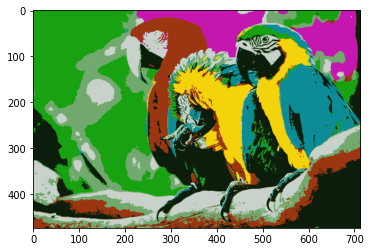

In [5]:
median_image, mean_image, psnt_median, psnt_mean = changeImage(8)
pylab.imshow(np.reshape(median_image, (w,h, -1)))
pylab.imshow(np.reshape(mean_image, (w,h, -1)))
print(psnt_median, psnt_mean)

1 9.460408259198367 9.83775889535693
2 11.683460422502064 12.11203558152671
3 12.8075029944792 13.176025694009379
4 14.03791054731849 14.394294489218185
5 15.206561560810828 15.559946338767901
6 16.082353332733582 16.572725471660867
7 17.366035472851294 17.671923270880107
8 18.175619955248532 18.468133827188314
9 18.85103065320656 19.14487020268468
10 19.450611158652173 19.675498079721162
11 19.898108909790377 20.162160628278038


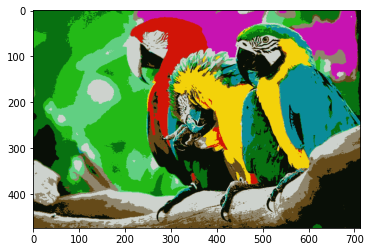

In [6]:
# Найдите минимальное количество кластеров, при котором значение PSNR выше 20 
# (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа 
# заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.

for k in range(1,21):
    median_image, mean_image, psnt_median, psnt_mean = changeImage(k)
    pylab.imshow(np.reshape(mean_image, (w,h, -1)))
    print(k, psnt_median, psnt_mean)
    if psnt_median > 20 or psnt_mean > 20:
        file = open('6-1.txt', 'w')
        file.write(str(k))
        file.close()
        break